# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [80]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

gs = pd.read_csv('/users/p2942432/downloads/churn_data.csv')
gs.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


Converted all the columns (strings) to Machine learning language of all columns data should be numeric to fit the ML model and setup the pycaret model.

In [81]:
gs['PhoneService'] = gs.PhoneService.map({'Yes':1,'No':0})
gs['Contract'] = gs.Contract.map({'One year':1,'Two year':1,'Month-to-month':0})
gs['PaymentMethod'] = gs.PaymentMethod.map({'Bank transfer (automatic)':1,'Credit card (automatic)':1,'Electronic check':0,'Mailed check':0})
gs['Churn'] = gs.Churn.map({'Yes':1,'No':0})
gs.loc[gs['MonthlyCharges']==' ','MonthlyCharges'] = np.nan 
gs['MonthlyCharges'] = gs['MonthlyCharges'].astype('float64')
gs.loc[gs['TotalCharges']==' ','TotalCharges'] = np.nan
gs['TotalCharges'] = gs['TotalCharges'].astype('float64')
gs.head()


,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,0,0,29.85,29.85,0
1,5575-GNVDE,34,1,1,0,56.95,1889.50,0
2,3668-QPYBK,2,1,0,0,53.85,108.15,1
3,7795-CFOCW,45,0,1,1,42.30,1840.75,0
4,9237-HQITU,2,1,0,0,70.70,151.65,1


Checking for any missing values in the Churn data sheet and found that 'TotalCharges' has 11 missing values as shown below.

In [82]:
gs.isna().sum()

customerID         0
tenure             0
PhoneService       0
Contract           0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

Filled those missing values with mean which is not accurate but I tried to fill the TotalCharges with 0's as accurate values but unbale to setup the pycaret model so I will take a look why it is getting error if I get sometime later.

In [83]:
gs['TotalCharges'].fillna(gs['TotalCharges'].mean(), inplace=True)

After filling the values with mean data then checked again for any missing values.

In [84]:
gs.isna().sum()

customerID        0
tenure            0
PhoneService      0
Contract          0
PaymentMethod     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

Importing pycaret classification methods to setup, compare, predictions, save and load the models.

In [85]:
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model

Setup initiated for target churn data assigned to churnML.

In [86]:
churnML = ClassificationExperiment() #setup(gs, target='churn')

This will ask us to check if the datatypes of the input data are correct. In this case, they seem fine. 

In [88]:
churnML = setup(gs, target = 'Churn')

,Description,Value
0,Session id,319
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 8)"
4,Transformed data shape,"(7043, 8)"
5,Transformed train set shape,"(4930, 8)"
6,Transformed test set shape,"(2113, 8)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [107]:
churnML

Next up, we simply run the autoML to find the best model:

In [90]:
best_model = churnML.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7671,0.8029,0.6399,0.5540,0.5931,0.4314,0.4341,0.0080
knn,K Neighbors Classifier,0.7669,0.7446,0.4343,0.5810,0.4958,0.3488,0.3556,0.0110
lr,Logistic Regression,0.7351,0.8325,0.0038,0.2500,0.0075,0.0044,0.0208,0.2890
dt,Decision Tree Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060
ridge,Ridge Classifier,0.7347,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070
rf,Random Forest Classifier,0.7347,0.6157,0.0000,0.0000,0.0000,0.0000,0.0000,0.0300
qda,Quadratic Discriminant Analysis,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070
ada,Ada Boost Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070
gbc,Gradient Boosting Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0230
lda,Linear Discriminant Analysis,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0070


Our best_model object now holds the highest-scoring model. We can also set an argument sort in compare_models to choose another metric as our scoring metric. By default, it uses accuracy.

In [108]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

We can now evaluate a variety of information about the best model:

In [92]:
churnML.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

We can now plot a variety of information about the best model:

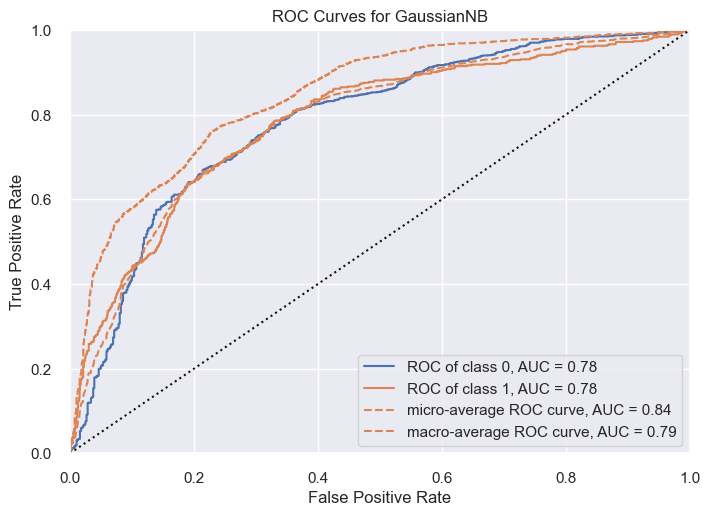

In [93]:
churnML.plot_model(best_model)

PyCaret can also plot a confusion matrix:

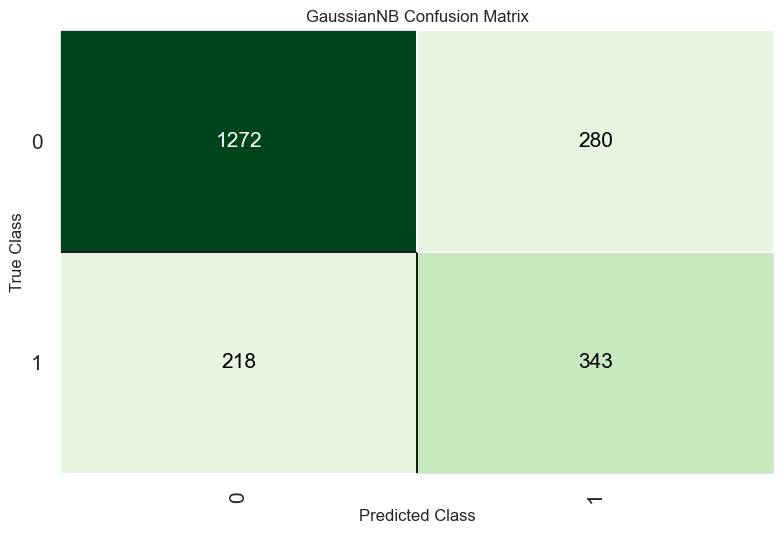

In [94]:
churnML.plot_model(best_model, plot = 'confusion_matrix')

We can now make predictions. For example, we can make predictions on the last row:

In [95]:
gs.iloc[-2:-1].shape

(1, 8)

We are selecting the last row, but using the indexing [-2:-1] to make it a 2D array instead of 1D (which throws an error).

We can use pycaret's predict_model function with the row above:

In [96]:
churnML.predict_model(best_model, gs.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
7041,8361-LTMKD,4,1,0,0,74.400002,306.600006,1,1,0.8177


We can see this creates a new column, 'Score', with the probability of class 1. It also creates a 'Label' column with the predicted label, where it rounds up if score is >= 0.5 (greater than or equal to 0.5).

We can also do predictions for the whole dataset:

In [97]:
predictions = churnML.predict_model(best_model, data=gs)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8461,0.9039,0.7817,0.6837,0.7294,0.6225,0.6253


First 5 rows of predictions are as shown below:

In [98]:
predictions.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,7590-VHVEG,1,0,0,0,29.850000,29.850000,0,1,0.6101
1,5575-GNVDE,34,1,1,0,56.950001,1889.500000,0,0,0.9941
2,3668-QPYBK,2,1,0,0,53.849998,108.150002,1,1,0.9726
3,7795-CFOCW,45,0,1,1,42.299999,1840.750000,0,0,0.9994
4,9237-HQITU,2,1,0,0,70.699997,151.649994,1,1,0.8167


In [99]:
churnML.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Trans...
                                                               verbose='deprecated'))

Saving and Loading the Model

Next, we want to save our trained model so we can use it in a Python file later. pycaret has a handy function for this, which saves the model as a pickle file:

In [100]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


Once we have our saved pycaret model, we can test loading it and making predictions to make sure it works:

In [101]:
new_pycaret.predict_model(loaded_model, gs.iloc[-2:-1])

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
7041,8361-LTMKD,4,1,0,0,74.400002,306.600006,1,1,0.8177


Making a Python module to make predictions

In [102]:
from IPython.display import Code

Code('predict_churn_pycaret.py')

predict_churn_pycaret.py

Created a Python script with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe, Python file/function should print out the predictions for new_churn_data.csv and the true values for the new data are [1, 0, 0, 1, 0] to print the data as 1s and 0's for this I commented the predictions replace method from the reference.


In [105]:
import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads Churn data into a DataFrame from a string filepath.
    """
    gs = pd.read_csv('/users/p2942432/downloads/churn_data.csv')
    return gs


def make_predictions(gs):
    """
    Uses the pycaret best model to make predictions on data in the gs dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=gs)
    predictions.rename({'Label': 'Churn'}, axis=1, inplace=True)
    # predictions['Churn'].replace({1: 'Yes', 0: 'No'},
                                            #inplace=True)
    return predictions['Churn']


if __name__ == "__main__":
    df = load_data('../data/new_churn_data.csv')
    predictions = make_predictions(gs)
    print('predictions:')
    print(predictions)

Transformation Pipeline and Model Successfully Loaded
predictions:
0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int8


# Summary

Learned how to use the data frame converted to Python scripting and model succesfully loaded then displayed the churn data predictions as requested in binary [1,0]. In this week, learned how to install Pycaret packages and imported classification experiment modules include setup, compare, predication, save and load modules. Bit struggled with python script troubleshooting 2 days back and finally fixed all the issues and get the churn data Model prediction successfully loaded.